In [1]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import sklearn.metrics
import pickle
import pandas as pd
import anndata
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adatae=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate.h5ad')
adatae2=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate2.h5ad')
adatae3=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate3.h5ad')
adatam=sc.read('../scRNA_paga/state_adata/iCELL8_minimize.h5ad')
adatam2=sc.read('../scRNA_paga/state_adata/iCELL8_minimize2.h5ad')
adatam3=sc.read('../scRNA_paga/state_adata/iCELL8_minimize3.h5ad')

In [38]:
sklearn.metrics.adjusted_mutual_info_score(subdata.obs.leiden, subdata.obs.nnet2)

0.4135151198161564

Trying to set attribute `.uns` of view, copying.


KeyError: 'CD14'

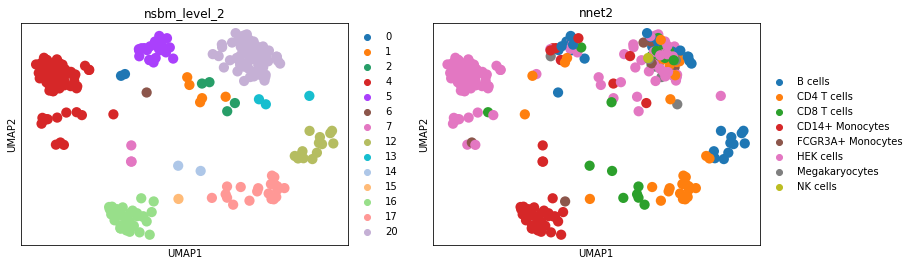

In [22]:
M=adatam.uns['nsbm']['cell_affinity']['2']
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2','CD14'])
subdata=adatam[adatam.obs.max_u < 1e-100]
sklearn.metrics.adjusted_mutual_info_score(subdata.obs.nsbm_level_2, subdata.obs.nnet2)

KeyError: 'ENSG00000170458'

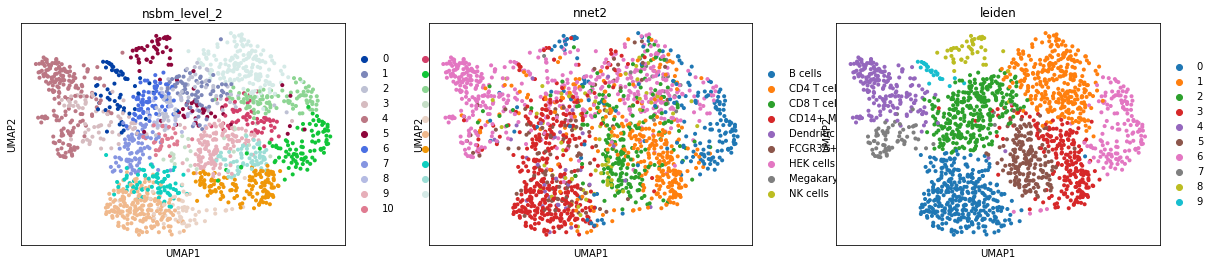

In [25]:
sc.pl.umap(adatam, color=['nsbm_level_2','nnet2','leiden','ENSG00000170458'])

Trying to set attribute `.uns` of view, copying.


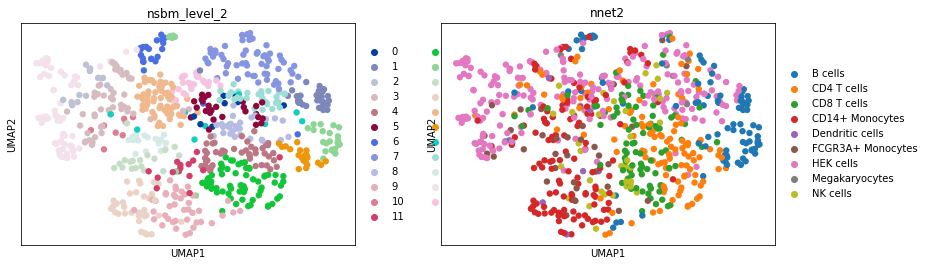

In [8]:
M=adatae2.uns['nsbm']['cell_affinity']['2']
adatae2.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatae2[adatae2.obs.max_u < 1e-5], color=['nsbm_level_2','nnet2'])

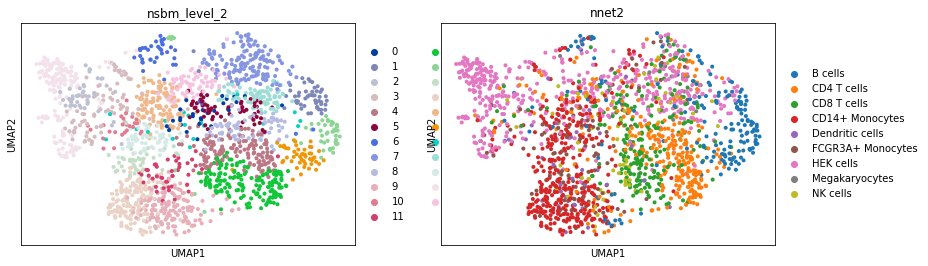

In [9]:
sc.pl.umap(adatae2, color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


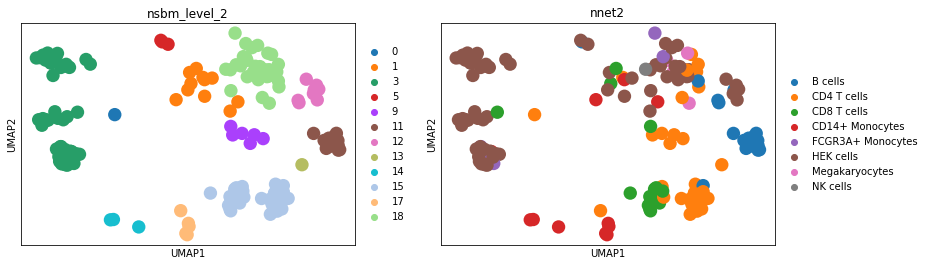

In [6]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam3[adatam3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

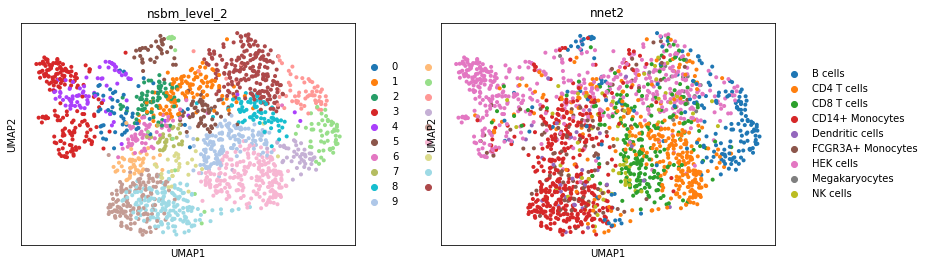

In [9]:
sc.pl.umap(adatam3, color=['nsbm_level_2','nnet2'])

In [11]:
sum(adatam.uns['nsbm']['stats']['level_entropy'])

132139.5167973067

In [12]:
sum(adatam2.uns['nsbm']['stats']['level_entropy'])

132045.06013905274

In [13]:
sum(adatam3.uns['nsbm']['stats']['level_entropy'])

132140.85941370288

In [14]:
ciao2=adatam2[adatam2.obs.max_u < 1e-100]

In [7]:
ciao3=adatam3[adatam3.obs.max_u < 1e-100]

In [ ]:
ciao1=adatam[adatam.obs.max_u < 1e-100]

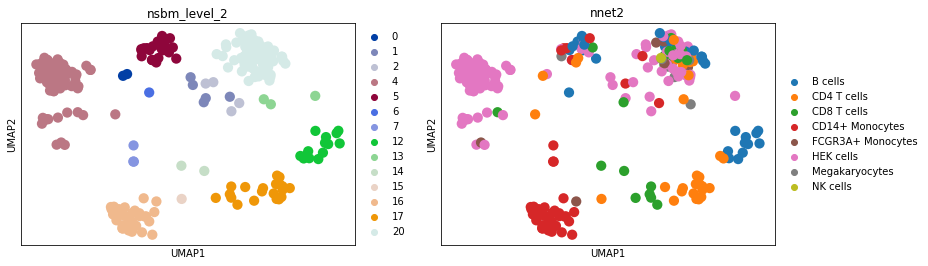

In [17]:
sc.pl.umap(ciao1, color=['nsbm_level_2','nnet2'])

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(ciao1, groupby='nsbm_level_2', method='logreg',max_iter=500)

Trying to set attribute `.uns` of view, copying.


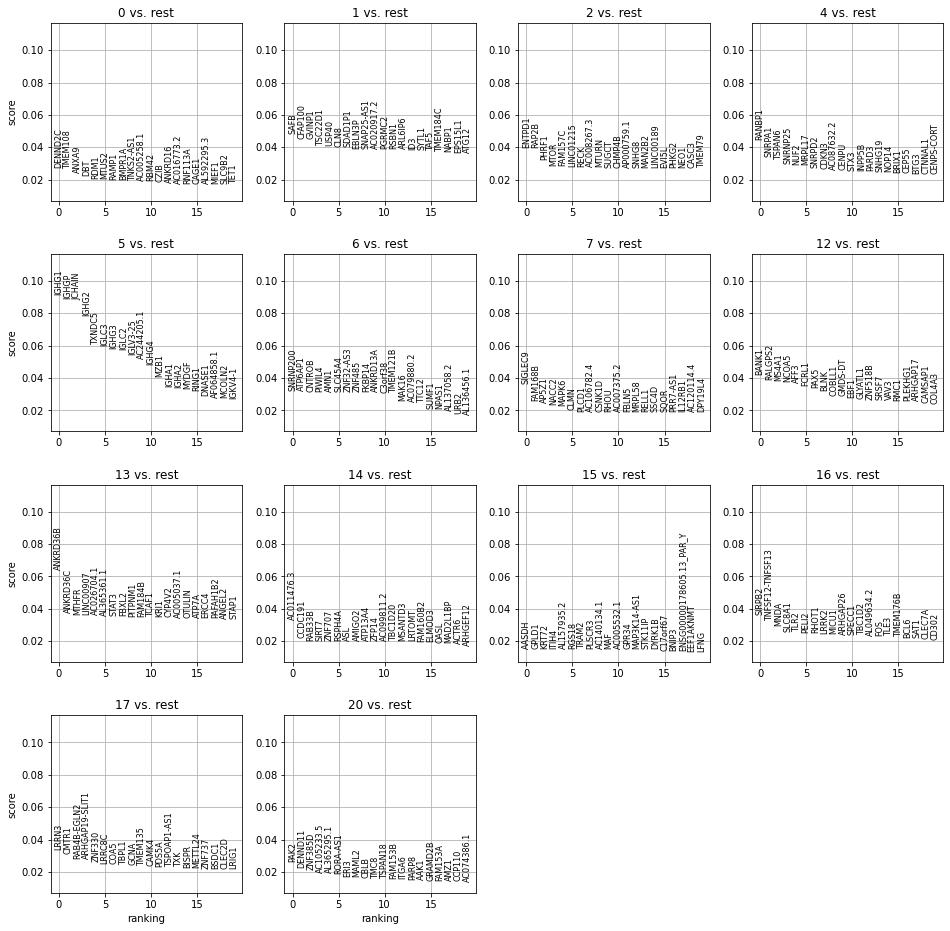

In [19]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(ciao1)

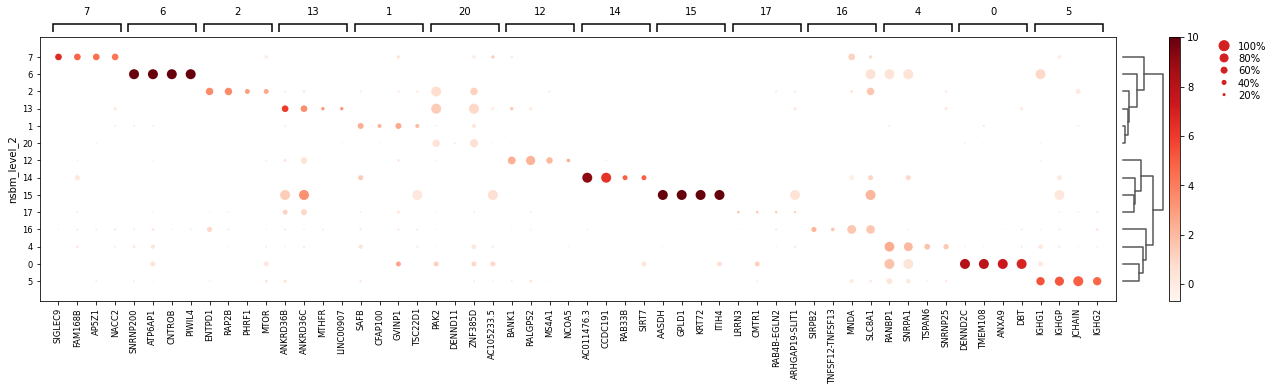

In [20]:
sc.pl.rank_genes_groups_dotplot(ciao1, n_genes=4)

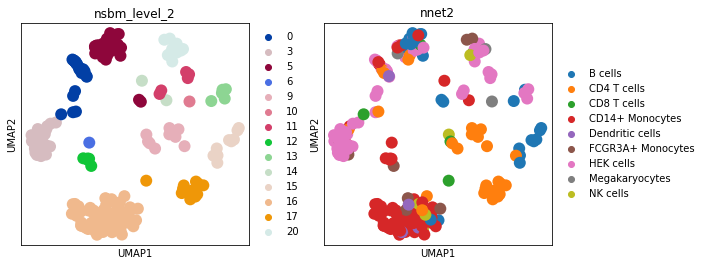

In [21]:
sc.pl.umap(ciao2, color=['nsbm_level_2','nnet2'])

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(ciao2, groupby='nsbm_level_2', method='logreg',max_iter=500)

Trying to set attribute `.uns` of view, copying.


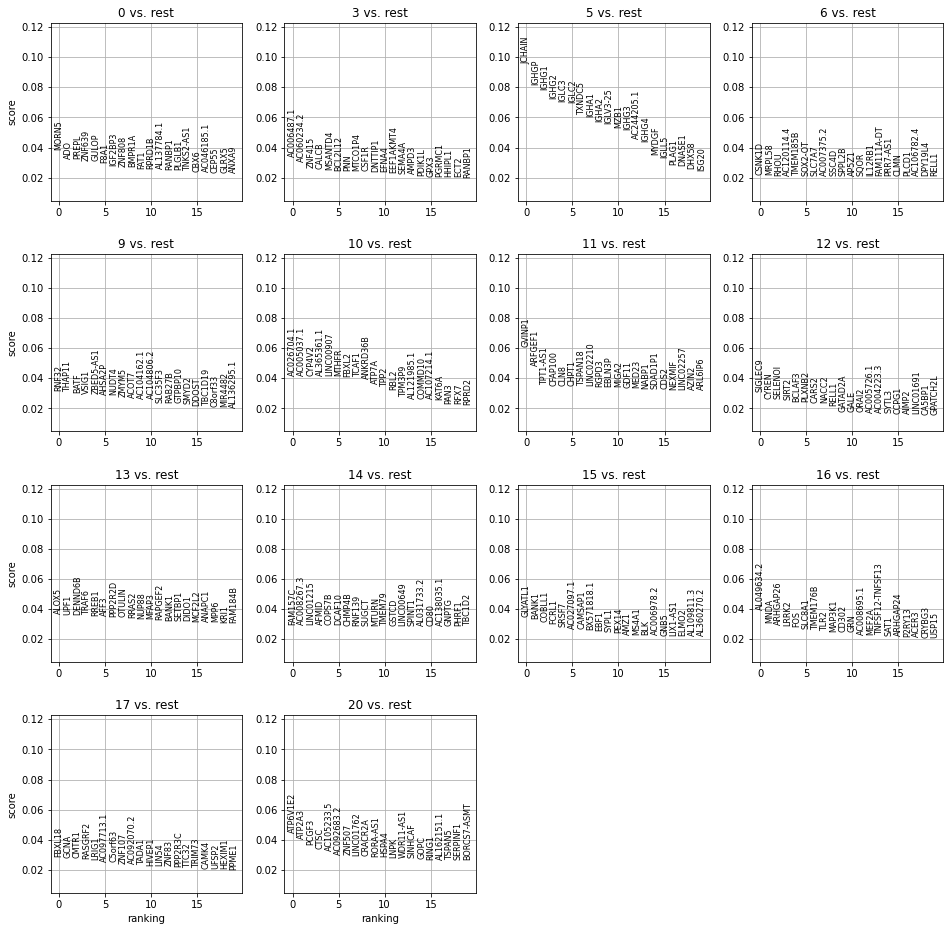

In [23]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(ciao2)

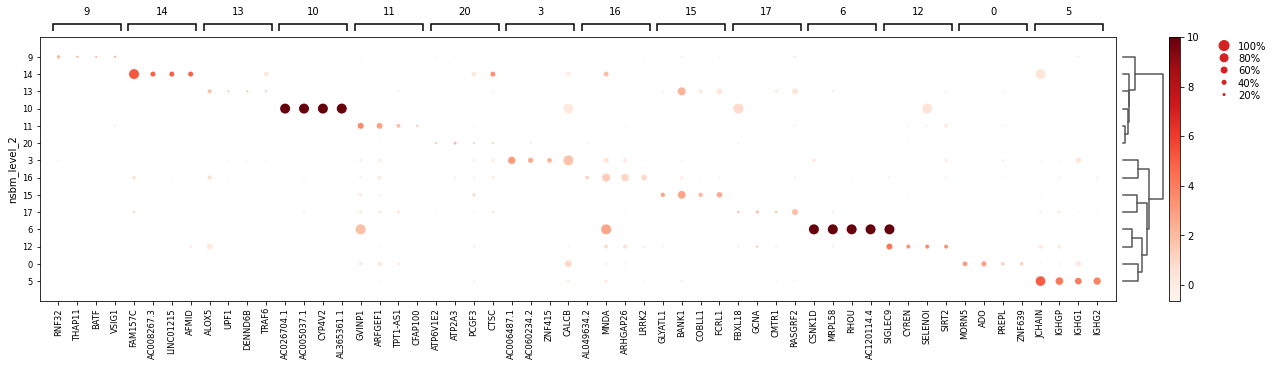

In [24]:
sc.pl.rank_genes_groups_dotplot(ciao2, n_genes=4)

In [25]:
ciao1.uns['rank_genes_groups']['names']['17']

array(['LRRN3', 'CMTR1', 'RAB4B-EGLN2', 'ARHGAP19-SLIT1', 'ZNF330',
       'LRRC8C', 'COA5', 'TBPL1', 'GCNA', 'TMEM135', 'CAMK4', 'PDS5A',
       'TSPOAP1-AS1', 'TXK', 'BISPR', 'METTL24', 'ZNF737', 'BSDC1',
       'CLEC2D', 'LRIG1', 'WDR36', 'OR1X5P', 'PRKCH', 'HIVEP1', 'STARD4',
       'ZNF562', 'CCDC22', 'ZNF83', 'PRKCQ', 'LIN54', 'PCGF5', 'DIP2B',
       'TDP1', 'TSHZ2', 'LINC02536', 'NIPAL3', 'AC020656.2', 'TOR1B',
       'TADA1', 'CRIPT', 'ANKRD44', 'IL2RB', 'SLC25A28', 'FBXL18',
       'USHBP1', 'THEMIS', 'TNIK', 'PSMD6-AS2', 'CGRRF1', 'AC009120.2',
       'LINC00243', 'KLHL32', 'RFXANK', 'CD247', 'LEF1', 'TFIP11',
       'GTF2H1', 'PHYH', 'SKA2', 'CFAP97', 'ANKZF1', 'MAP4K2', 'IFITM2',
       'RCL1', 'ANO9', 'RASGRF2', 'CYP2F1', 'BRMS1', 'SGSM1',
       'AC074386.1', 'ANTXRLP1', 'KCNG2', 'CNTRL', 'TTC38', 'RPRD2',
       'EPB41', 'TTC32', 'AC092944.1', 'ARAF', 'LIX1L-AS1', 'ANKRD36C',
       'AC074032.1', 'AL136962.1', 'RPAP2', 'FXYD5', 'AC008537.1',
       'BTBD9', 'LRIF1', 'DL

In [26]:
print(ciao2.uns['rank_genes_groups']['names']['17'])

['FBXL18' 'GCNA' 'CMTR1' 'RASGRF2' 'LRIG1' 'AC097713.1' 'C5orf63' 'ZNF107'
 'AC092070.2' 'TADA1' 'HIVEP1' 'LIN54' 'ZNF83' 'PPP2R3C' 'TTC32' 'TRIM73'
 'CAMK4' 'UFSP2' 'HEXIM1' 'PPME1' 'MCCC1' 'TSHZ2' 'ALDH16A1' 'APTX' 'PECR'
 'PKIA' 'ANXA6' 'ZNF430' 'IQCG' 'ZNF23' 'LRIF1' 'INTS2' 'LINC02536'
 'AC008892.1' 'GTF2H1' 'TOM1L2' 'CNTRL' 'PNKP' 'ARHGAP19-SLIT1' 'PRKCH'
 'COA5' 'ENOPH1' 'GALK2' 'CASK' 'FDX1' 'AC093423.2' 'ZNF330' 'AC008537.1'
 'SYNJ1' 'NSUN5P2' 'WDR53' 'LAMTOR3' 'LRRC8C' 'INPP4B' 'AC074032.1'
 'RAB4B-EGLN2' 'DHRS1' 'PCGF5' 'ANK3' 'CLEC2D' 'ERCC6L2' 'MED30' 'MDS2'
 'FOXRED1' 'SLC9B1' 'TMEM135' 'KLHL32' 'GPBP1' 'SACS' 'TNIK' 'ZBTB43'
 'RPRD2' 'TAF9B' 'IATPR' 'ABLIM1' 'CD247' 'MEPCE' 'SLC30A9' 'AC087854.1'
 'TC2N' 'NEPRO' 'H2AJ' 'ETFDH' 'PCDH12' 'ZNF331' 'TIMD4' 'AC001226.2'
 'PDS5A' 'PJA1' 'P2RX7' 'AC009120.2' 'MRPL2' 'SERINC5' 'RAI14' 'MTHFD2L'
 'HAUS8' 'GFPT1' 'LINC02762' 'AC099850.3' 'ZFYVE21']


In [27]:
for x in ciao2.uns['rank_genes_groups']['names']['15']:
    print(x)

GLYATL1
BANK1
COBLL1
FCRL1
SRSF7
AC027097.1
CAMSAP1
BX571818.1
EBF1
SYPL1
PEX14
AMZ1
MS4A1
BLK
AC006978.2
GNB5
LIX1-AS1
ELMO2
AL109811.3
AL360270.2
ST6GAL1
CD22
GOLGA1
RALGPS2
RNF216
AFF3
SH3BP5
MARK2
STAP1
AC003006.1
CECR7
SLC2A1
JADE3
ABL1
KLHL3
TRUB1
ZBTB21
PAX5
P2RX5-TAX1BP3
COX19
MFAP3
LINC01135
NCOA5
IGLV10-54
CDCA7L
BLNK
NDUFAF6
TERF2
ENSG00000225541.1
CREB1
WDR53
IGLL5
CNBD2
WDR25
KIAA0586
FRA10AC1
ENSG00000270898.5
POLI
APOL6
AP005018.2
AC007569.1
C1QBP
AP000866.2
EMBP1
COL4A3
RGMB
MRPS23
TMEM168
ZNF331
ENSG00000255767.1
TGFBR2
COX10-AS1
PIGHP1
RALGDS
C14orf93
PSMD3
MOB3B
AL139353.1
GMDS-DT
RGPD4
CPED1
SNHG10
PRKD1
TCAF1P1
PLEKHG5
RUBCNL
NSUN2
TRIM62
AUTS2
AC093525.2
GPM6A
UBOX5
TYSND1
AC010320.4
AKT3
IGHD
ZBED5-AS1
ZNF286A
SOX5
URGCP


### Linear flat model

In [43]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
ciao3=adatam3[adatam3.obs.max_u < 1e-10]

In [44]:
import statsmodels.api as sm

In [45]:
marginals = ciao3.uns['nsbm']['cell_affinity']['2'] 
#marginals = marginals / np.sum(marginals, axis=1).max()

In [46]:
groups = sm.tools.categorical(data = ciao3.obs, col='nsbm_level_2', drop=True) 
expr_values = ciao3.X

In [47]:
flat_model = [sm.GLM(expr_values[:, x], sm.add_constant(groups)) for x in range(expr_values.shape[1])]
flat_results = [x.fit() for x in flat_model]

In [48]:
flat_scores = np.array([x.params[1:] for x in flat_results])
flat_pvals = np.array([x.pvalues[1:] for x in flat_results])
flat_fdr = np.array([sm.stats.multipletests(flat_pvals[:, x], method='fdr_bh')[1] for x in range(flat_pvals.shape[1])]).T

In [49]:
gene_names = []
gene_scores = []
gene_pvalues = []
gene_fdr = []
gene_foldchange = []
for x in range(flat_scores.shape[1]):
    up_mask = flat_scores[:, x] > 0
    scores = flat_scores[up_mask, x]
    pvals = flat_pvals[up_mask, x]
    genes = np.array(ciao3.var_names)[up_mask]
    fdr = flat_fdr[up_mask, x]
    selected = np.argsort(fdr)[:500]
    order = np.argsort(scores[selected])[::-1]
    gene_names.append(genes[selected][order])
    gene_scores.append(scores[selected][order])
    gene_pvalues.append(pvals[selected][order])
    gene_fdr.append(fdr[selected][order])
    gene_foldchange.append(scores[selected][order])
    

In [50]:
ciao3.uns['flat_gene_glm'] = {
    'params': {'groupby': 'nsbm_level_2',
              'reference': 'rest',
              'method': 'GLM',
              'use_raw': False,
              'layer': None,
              'corr_method': 'benjamini-hochberg'},
    'scores': np.rec.fromarrays([n for n in gene_scores], dtype=[(rn, 'float32') for rn in ciao3.obs.nsbm_level_2.cat.categories]),
    'logfoldchanges': np.rec.fromarrays([n for n in gene_scores], dtype=[(rn, 'float32') for rn in ciao3.obs.nsbm_level_2.cat.categories]),    
    'pvals': np.rec.fromarrays([n for n in gene_pvalues], dtype=[(rn, 'float32') for rn in ciao3.obs.nsbm_level_2.cat.categories]),    
    'pvals_adj': np.rec.fromarrays([n for n in gene_fdr], dtype=[(rn, 'float32') for rn in ciao3.obs.nsbm_level_2.cat.categories]),        
    'names': np.rec.fromarrays([n for n in gene_names], dtype=[(rn, 'U50') for rn in ciao3.obs.nsbm_level_2.cat.categories]),        
}

Trying to set attribute `.uns` of view, copying.


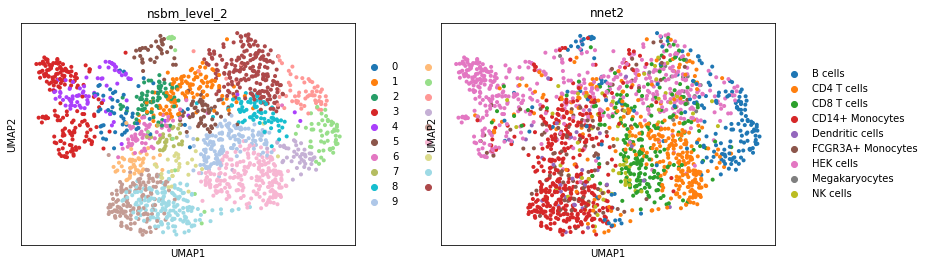

In [16]:
sc.pl.umap(adatam3, color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


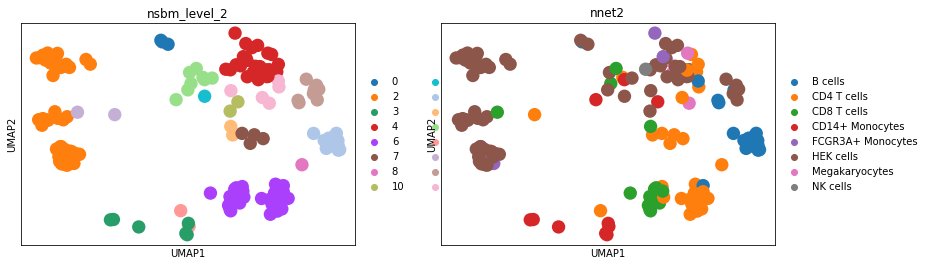

In [31]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatae3[adatam3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


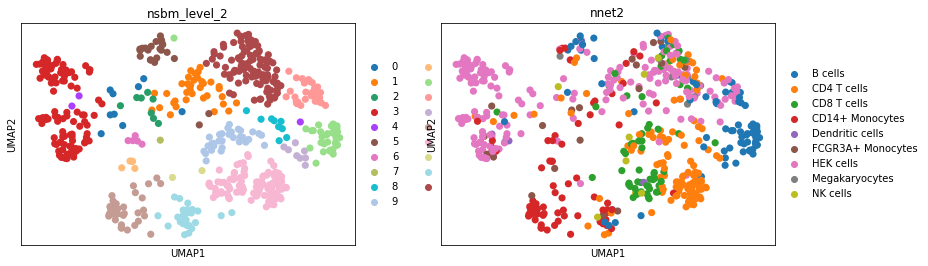

In [52]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam3[adatam3.obs.max_u < 1e-10], color=['nsbm_level_2','nnet2'])

In [54]:
suca=[]
for x in range(len(ciao3.uns['flat_gene_glm']['names']['17'])):
    if ciao3.uns['flat_gene_glm']['pvals_adj']['17'][x]<0.05:
        suca.append(ciao3.uns['flat_gene_glm']['names']['17'][x])
        print(ciao3.uns['flat_gene_glm']['names']['17'][x])
print(suca,len(suca))

ELMOD3
CITED2
MNDA
IL1B
MIR646HG
RXFP2
PAX5
RUNX1
SLX4IP
PLIN3
TTC37
DROSHA
AFF3
VAV3
TSC1
FBXO41
NAGA
SNTG2
CHKA
ZNF493
UHRF1
ABCC4
ADAM12
AC107871.1
ZNF395
AC004069.1
LINC00877
RGS14
CBL
MBNL1
MEF2A
MPZL1
SH2D3A
HOOK3
CORO7-PAM16
FCHSD2
KCNE1
AL133216.2
BANK1
IFNG-AS1
EZH1
AC005562.1
P2RX5-TAX1BP3
VPS8
ICE1
FOXO1
MAML2
PBX4
STAT5A
ALPK1
ZBTB43
CD244
WDR4
ANKRD44
STXBP3
VWA8
IFIT3
TLR2
RUNX2
LINC00937
ZNF767P
RIOK2
ARHGAP15
LMBRD1
RNPEP
HLA-DPB1
GABPA
CFP
MAP3K1
CREBBP
CHCHD7
STX18-AS1
MAP3K14-AS1
SLC2A6
AC146944.1
AC233699.1
LEPROT
COX19
UBXN7
HNMT
CHST11
POC1B
CLMN
ARHGAP26
SOGA1
SP110
MRPL45P2
LLGL2
GOLGB1
WDR25
GK
SYMPK
POMT1
AC078927.1
PUS10
RUBCNL
NOMO3
WDR89
DLEU2
DYSF
AC005614.2
RABGAP1L
AC016831.6
FCRL1
SETBP1
NCF4
ADSS2
CYB561D1
RNF13
FAM20B
UBE2D2
PACS1
TAF8
EPB41
FAM177A1
APBB1IP
AL159163.1
C15orf39
MDFIC
ARMH1
CD79B
LINC00298
ELMO1
AL163540.1
PUM2
TEX14
TCAIM
ARFGAP1
P2RX7
ZNF701
TRIM37
COBLL1
NTM
OSBPL8
SMAP2
MINDY1
RORA-AS1
ITIH4
ZDHHC3
SNHG8
ZMYND11
GABARAP
ST6GALNAC3


In [32]:
for x in range(len(ciao3.uns['flat_gene_glm']['names']['18'])):
    print(ciao3.uns['flat_gene_glm']['names']['18'][x], ciao3.uns['flat_gene_glm']['pvals_adj']['18'][x])

PAK2 0.0001346778
CSGALNACT1 0.1172128
DENND11 0.045347586
FAM98B 0.21194348
AC105233.5 0.16373219
ZNF385D 0.008640655
MAML2 0.14067546
LINC01572 0.24417794
LINC00544 0.26780894
DTX3 0.30373752
TSPAN18 0.4828647
PDE3B 0.26217657
RRN3P1 0.39629525
KIF16B 0.48565167
ACAD9 0.6863434
INPP5A 0.58163905
ATP9B 0.5946135
CBLB 0.4840476
NBPF3 0.71730405
TNRC6C 0.67168665
DCP2 0.7201075
AL365295.1 0.5165111
SIRT5 0.59750974
AC010300.1 0.36267012
ZNF276 0.7256541
B3GAT1 0.42277792
ZNF93 0.3867309
CRACR2A 0.58119404
AC098650.1 0.023742463
SUPT3H 0.78998107
IBA57 0.5462675
AAK1 0.74429417
WDR86-AS1 0.68166924
PAG1 0.6083868
AXIN2 0.72135293
RORA-AS1 0.6696235
CROCCP3 0.65552074
SPOUT1 0.68166924
UBE3A 0.8244889
CD302 0.85856223
ZZZ3 0.6813148
LEF1-AS1 0.9146147
MBD1 0.8891627
MAN1C1 0.86631125
GVINP1 0.8215512
C16orf72 0.933937
POT1 0.68947923
GDF11 0.65776443
OTUD5 0.53370506
ZNF862 0.9594527
SPATA45 0.45767143
AL691449.1 0.86396474
GK5 0.6988122
AC009126.1 0.9509254
LINC01115 0.51220006
AC008467.